# NFL Data Project

## Data Imports

In [2]:
import re
import os
import pandas as pd
import numpy as np
import math
import glob
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

import warnings
warnings.filterwarnings("ignore")

In [3]:
nfl = pd.read_csv('nfl_team_stats_2002-2023.csv')
nfl

,season,week,date,away,home,score_away,score_home,first_downs_away,first_downs_home,third_down_comp_away,...,redzone_comp_home,redzone_att_home,fumbles_away,fumbles_home,interceptions_away,interceptions_home,def_st_td_away,def_st_td_home,possession_away,possession_home
0,2002,1,2002-09-05,49ers,Giants,16,13,13,21,4,...,0,6,0,0,1,3,0,0,27:32,32:28
1,2002,1,2002-09-08,Jets,Bills,37,31,18,26,2,...,0,8,1,1,0,2,2,0,21:06,39:08
2,2002,1,2002-09-08,Vikings,Bears,23,27,19,20,5,...,0,6,1,1,2,1,0,0,31:31,28:29
3,2002,1,2002-09-08,Chargers,Bengals,34,6,27,13,6,...,0,5,0,0,0,1,0,0,37:48,22:12
4,2002,1,2002-09-08,Chiefs,Browns,40,39,24,24,5,...,0,10,0,1,1,0,0,0,30:16,29:44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5924,2023,Division,2024-01-21,Buccaneers,Lions,23,31,23,26,4,...,3,4,0,0,2,0,0,0,28:00,32:00
5925,2023,Division,2024-01-21,Chiefs,Bills,27,24,21,27,1,...,3,4,1,0,0,0,0,0,22:57,37:03
5926,2023,Conference,2024-01-28,Chiefs,Ravens,17,10,22,16,8,...,0,1,0,2,0,1,0,0,37:30,22:30
5927,2023,Conference,2024-01-28,Lions,49ers,31,34,28,23,6,...,4,5,1,0,0,1,0,0,27:48,32:12


## Data Preprocessing

### Understanding the Data

In [4]:
# Group by 'season' and count rows
season_counts = nfl.groupby('season').size()

print(season_counts)

season
2002    267
2003    267
2004    267
2005    267
2006    267
2007    267
2008    267
2009    267
2010    267
2011    267
2012    267
2013    267
2014    267
2015    267
2016    267
2017    267
2018    267
2019    267
2020    269
2021    285
2022    284
2023    285
dtype: int64


In [5]:
nRow, nCol = nfl.shape
print(f'There are {nRow} rows and {nCol} columns.')

print("\nList of columns:\n")
print(nfl.columns.tolist())

There are 5929 rows and 53 columns.

List of columns:

['season', 'week', 'date', 'away', 'home', 'score_away', 'score_home', 'first_downs_away', 'first_downs_home', 'third_down_comp_away', 'third_down_att_away', 'third_down_comp_home', 'third_down_att_home', 'fourth_down_comp_away', 'fourth_down_att_away', 'fourth_down_comp_home', 'fourth_down_att_home', 'plays_away', 'plays_home', 'drives_away', 'drives_home', 'yards_away', 'yards_home', 'pass_comp_away', 'pass_att_away', 'pass_yards_away', 'pass_comp_home', 'pass_att_home', 'pass_yards_home', 'sacks_num_away', 'sacks_yards_away', 'sacks_num_home', 'sacks_yards_home', 'rush_att_away', 'rush_yards_away', 'rush_att_home', 'rush_yards_home', 'pen_num_away', 'pen_yards_away', 'pen_num_home', 'pen_yards_home', 'redzone_comp_away', 'redzone_att_away', 'redzone_comp_home', 'redzone_att_home', 'fumbles_away', 'fumbles_home', 'interceptions_away', 'interceptions_home', 'def_st_td_away', 'def_st_td_home', 'possession_away', 'possession_home']


In [6]:
# Display the number of null values by column
columns_with_nulls = nfl.columns[nfl.isnull().any()]
null_values_by_column = nfl[columns_with_nulls].isnull().sum()
print(null_values_by_column)

Series([], dtype: float64)


There are no null values in the data to address.

In [7]:
nfl.iloc[5500:, ]

,season,week,date,away,home,score_away,score_home,first_downs_away,first_downs_home,third_down_comp_away,...,redzone_comp_home,redzone_att_home,fumbles_away,fumbles_home,interceptions_away,interceptions_home,def_st_td_away,def_st_td_home,possession_away,possession_home
5500,2022,10,2022-11-13,Broncos,Titans,10,17,18,14,4,...,1,2,0,1,1,0,0,0,33:57,26:03
5501,2022,10,2022-11-13,Jaguars,Chiefs,17,27,17,26,4,...,4,5,0,2,0,1,0,0,31:39,28:21
5502,2022,10,2022-11-13,Browns,Dolphins,17,39,20,29,5,...,3,5,1,0,0,0,0,0,26:46,33:14
5503,2022,10,2022-11-13,Texans,Giants,16,24,22,19,3,...,2,2,1,0,1,0,0,0,26:40,33:20
5504,2022,10,2022-11-13,Saints,Steelers,10,20,10,28,3,...,2,5,0,0,2,0,0,0,21:04,38:56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5924,2023,Division,2024-01-21,Buccaneers,Lions,23,31,23,26,4,...,3,4,0,0,2,0,0,0,28:00,32:00
5925,2023,Division,2024-01-21,Chiefs,Bills,27,24,21,27,1,...,3,4,1,0,0,0,0,0,22:57,37:03
5926,2023,Conference,2024-01-28,Chiefs,Ravens,17,10,22,16,8,...,0,1,0,2,0,1,0,0,37:30,22:30
5927,2023,Conference,2024-01-28,Lions,49ers,31,34,28,23,6,...,4,5,1,0,0,1,0,0,27:48,32:12


In [8]:
#GLOSSARY

#1-19 :FGM 1-19 yards
#20-29 :FGM 20-29 yards
#2PT:Total Two Point Conversions
#30-39:FGM 30-39 yards
#40-49 :FGM 40-49 yards
#50+:FGM 50+ yards
#AST:Assist Tackles
#ATT:Punt Returns
#AVG:Yards Per Rush Attempt
#CAR:Rushing Attempts
#CMP:Completions
#CMP%:Completion Percentage
#FC:Punt Return Fair Catches
#FD:Rushing 1st downs
#FF:Forced Fumbles
#FG:Field Goals
#FG%:Field Goal Percentage
#FR:Fumbles Recovered
#FUM:Rushing Fumbles
#GP:Games Played
#IN20:Punts Inside 20
#IN20%:Punts Inside 20 Percentage
#INT:Interceptions
#KB:Kicks Blocked
#KRFC:Kick Return Fair Catches
#LNG:Long Rushing
#LST:Rushing Fumbles Lost
#NET:Net Average Punt Yards
#PASS:Passing Touchdowns
#PAT:Kick Extra Points
#PD:Passes Defended
#PTS:Total Points
#PUNTS:Punts
#QBR:Adjusted QBR
    
#REC:Receptions
#RET:Return Touchdowns
#RTG:Passer Rating
#RUSH:Rushing Touchdowns
#SACK:Total Sacks
#SOLO:Solo Tackles
#STF:Stuffs
#STFYDS:Stuff Yards
#TB:Touchbacks
#TB%:Touchback Percentage
#TD:Rushing Touchdowns
#TGTS:Receiving Targets
#TOT:Total Tackles
#XPA:Extra Point Attempts
#XPM:Extra Points Made
#YDS:Rushing Yards

### Data Wrangling

In [8]:
# Create 'home_win' column
nfl['home_win'] = 'No'
nfl.loc[nfl['score_home'] > nfl['score_away'], 'home_win'] = 'Yes'
nfl.loc[nfl['score_home'] == nfl['score_away'], 'home_win'] = 'Tied'

# Create 'away_win' column
nfl['away_win'] = 'No'
nfl.loc[nfl['score_home'] < nfl['score_away'], 'away_win'] = 'Yes'
nfl.loc[nfl['score_home'] == nfl['score_away'], 'away_win'] = 'Tied'

# Create 'winner' column
nfl['winner'] = nfl['home'].where(nfl['home_win'] == 'Yes', nfl['away'])
nfl.loc[nfl['home_win'] == 'Tied', 'winner'] = 'Tie'

### Exploratory Data Analysis

The following 3 visualizations are iterations of https://www.kaggle.com/code/kerneler/starter-nfl-team-stats-2002-2019-27043d62-f 

In [9]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = math.ceil((nCol + nGraphPerRow - 1) / nGraphPerRow)
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [10]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = "cool"
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [11]:
def plotCorrelationMatrix(df, graphWidth, plot_title):
    numeric_df = df.select_dtypes(include=['number'])  # Select only numeric columns
    if numeric_df.shape[1] < 2:
        print(f'No correlation plots shown: The number of numeric columns ({numeric_df.shape[1]}) is less than 2')
        return
    corr = numeric_df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum=1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {plot_title}', fontsize=15)
    plt.show()

In [12]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. = %.3f' % corrs[i, j], (0.65, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

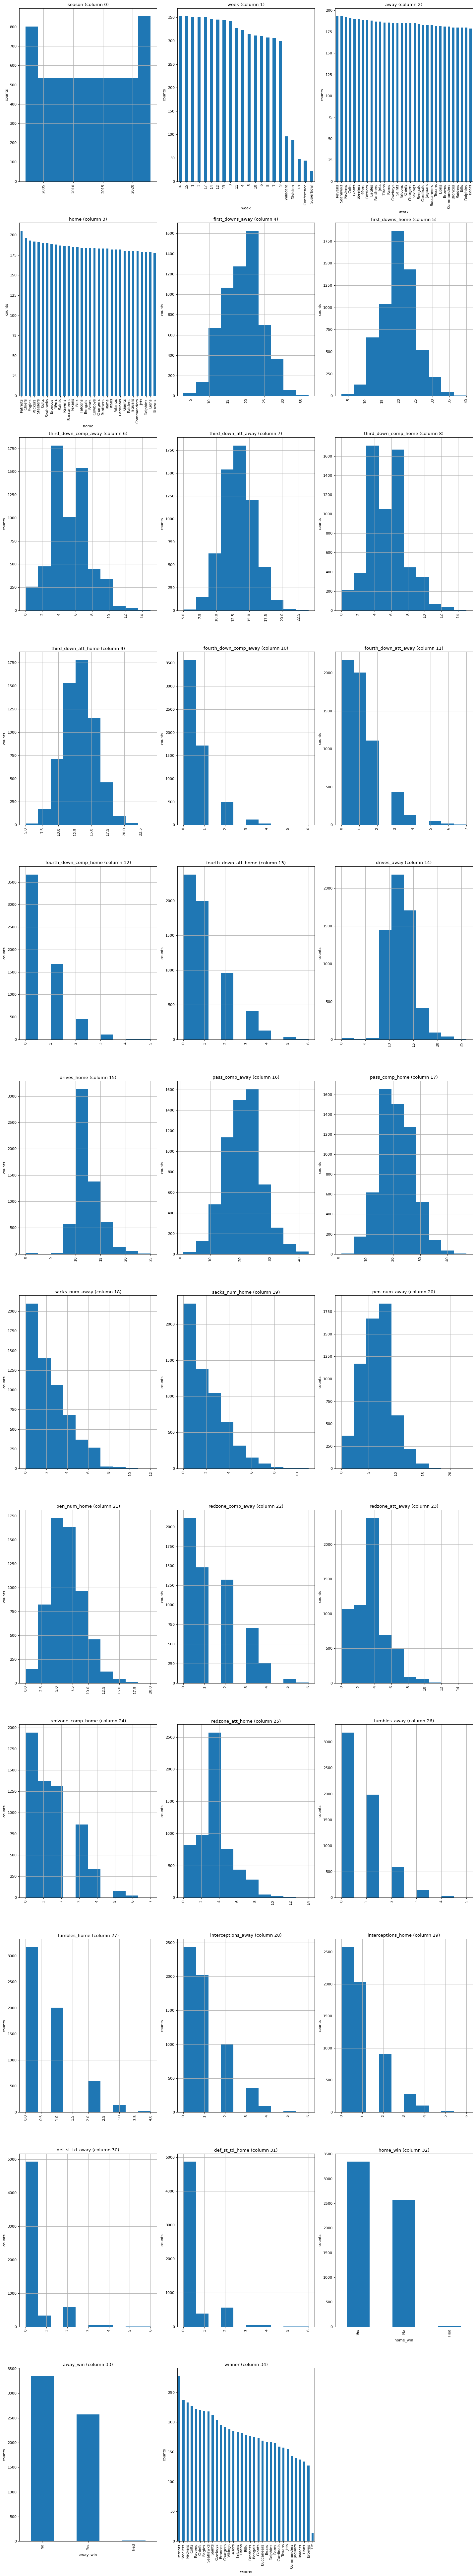

In [13]:
plotPerColumnDistribution(nfl, 35, 3)

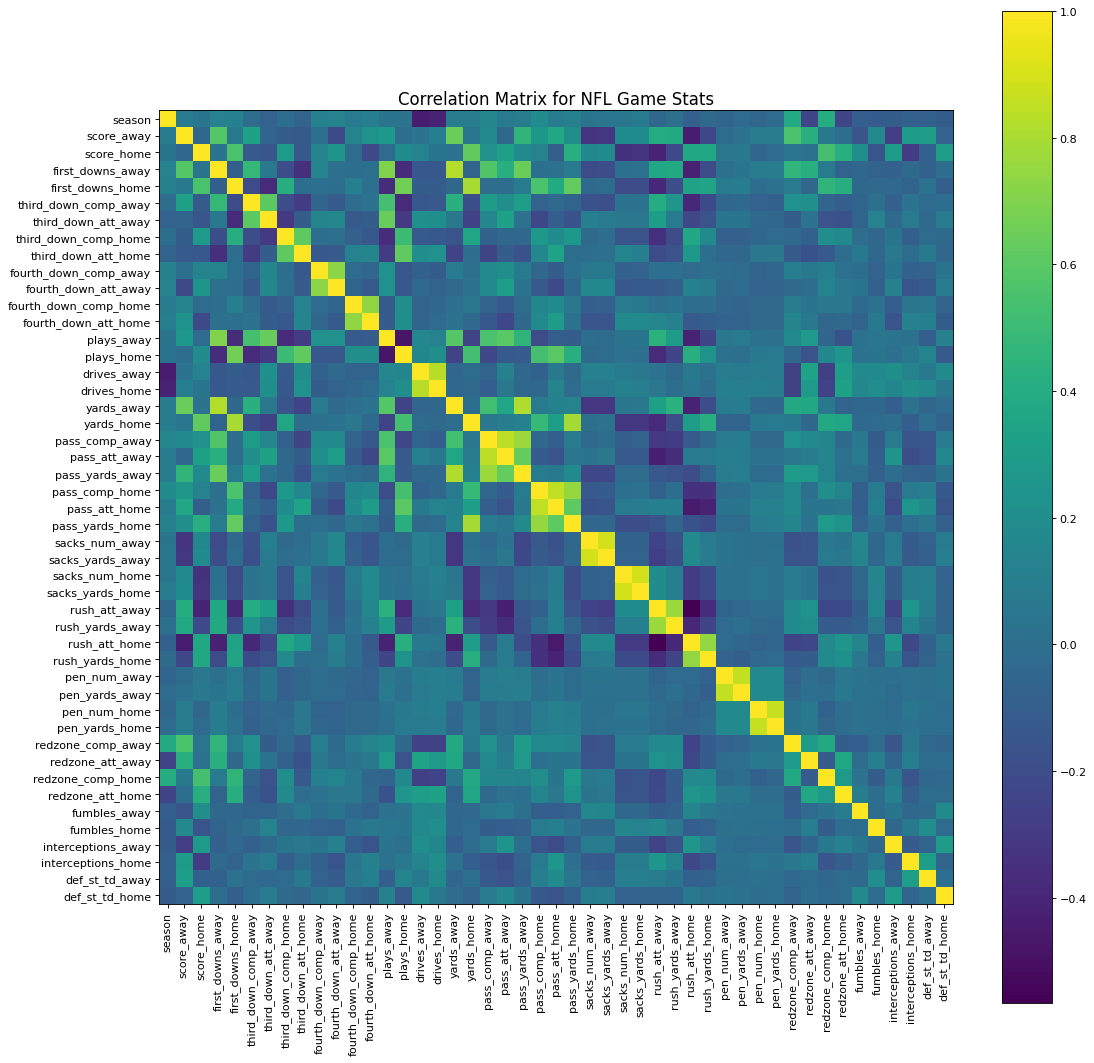

In [14]:
plotCorrelationMatrix(nfl, 16, "NFL Game Stats")

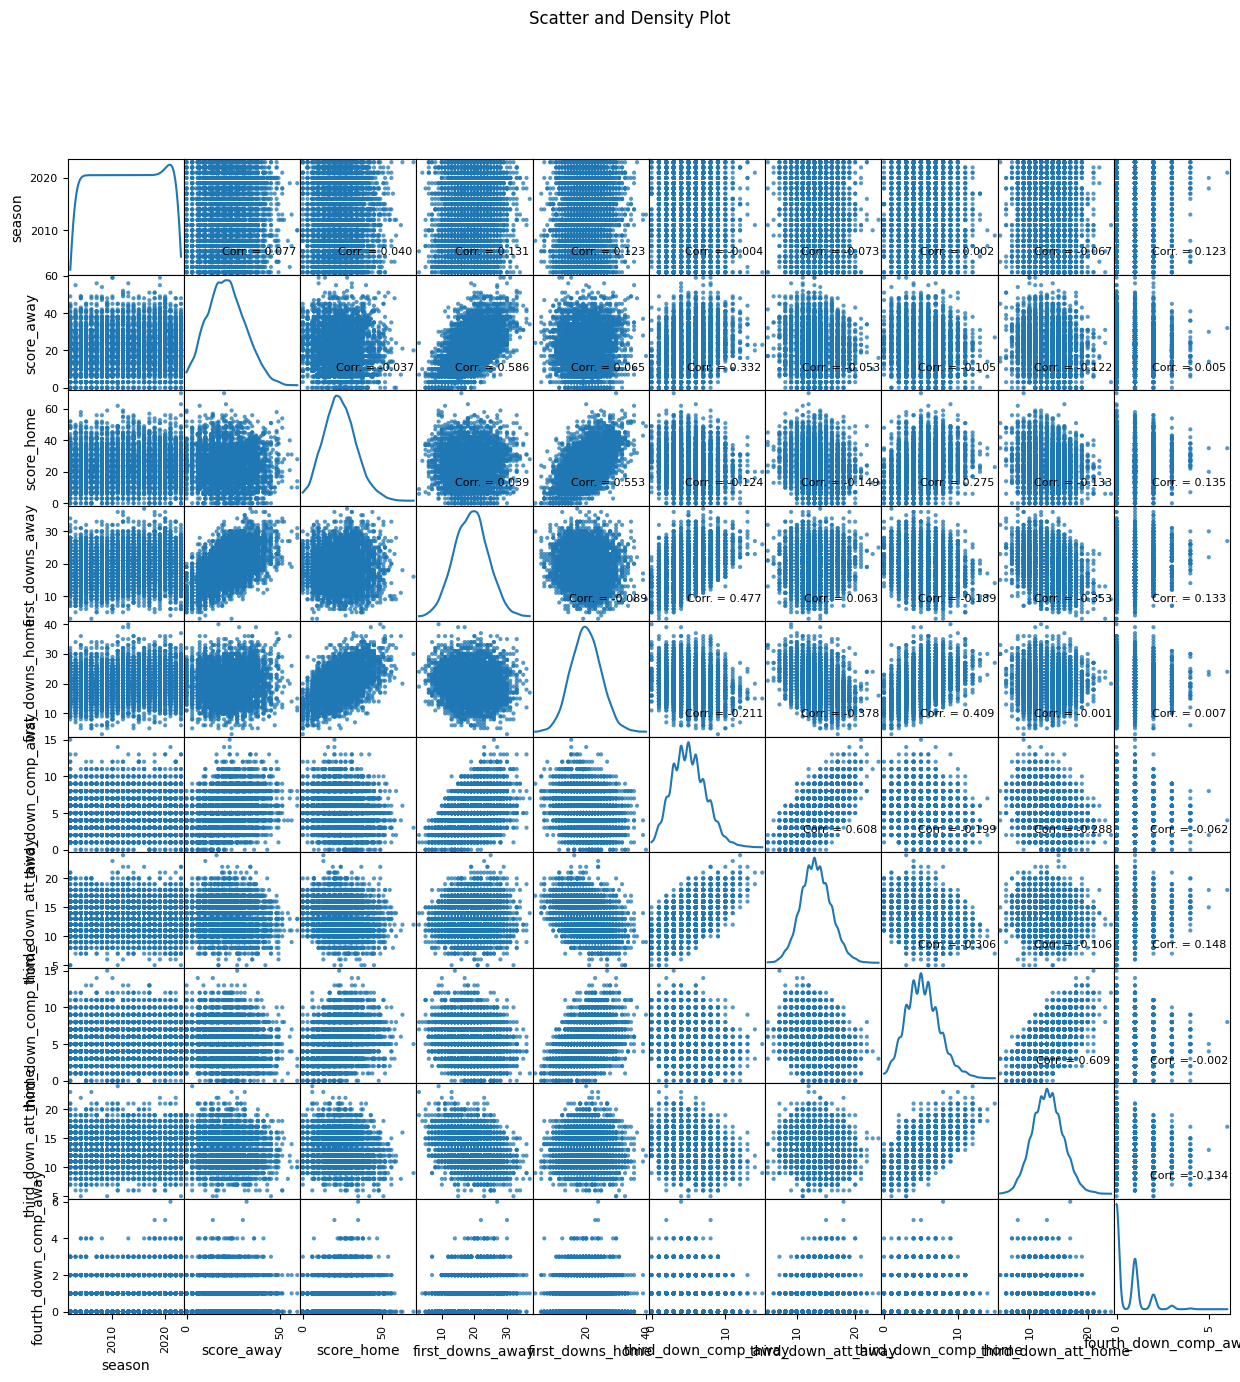

In [15]:
plotScatterMatrix(nfl, 15, 8)